In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2020-02-14,0.009399
2020-02-18,-0.010119
2020-02-19,0.004554
2020-02-20,0.009047
2020-02-21,0.006300


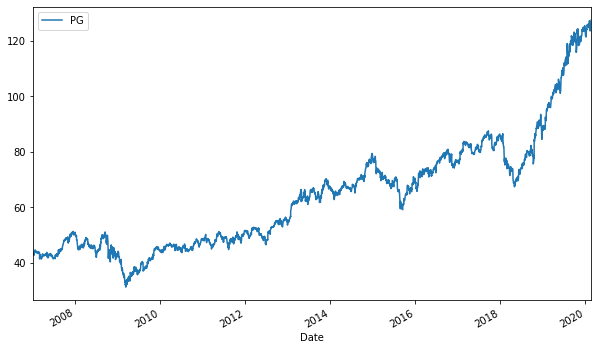

In [5]:
data.plot(figsize=(10,6))

In [7]:
u = log_returns.mean()
u

PG    0.000325
dtype: float64

In [8]:
var = log_returns.var()
var

PG    0.000119
dtype: float64

In [9]:
drift = u - (0.5 * var)
drift

PG    0.000266
dtype: float64

In [10]:
stdev = log_returns.std()
stdev

PG    0.010921
dtype: float64

In [11]:
type(drift)

pandas.core.series.Series

In [12]:
type(stdev)

pandas.core.series.Series

In [13]:
np.array(drift)

array([0.00026581])

In [14]:
drift.values

array([0.00026581])

In [15]:
stdev.values

array([0.01092076])

In [16]:
norm.ppf(0.95)

1.6448536269514722

In [18]:
x = np.random.rand(10,2)
x

array([[0.73163135, 0.80316216],
       [0.93558387, 0.13191557],
       [0.06247585, 0.90973026],
       [0.98242801, 0.98289162],
       [0.38605847, 0.29854388],
       [0.92760937, 0.46022613],
       [0.87288702, 0.79335431],
       [0.55260755, 0.30510593],
       [0.9355275 , 0.69627717],
       [0.89984294, 0.45158019]])

In [19]:
norm.ppf(x)

array([[ 0.61775431,  0.85297047],
       [ 1.5187229 , -1.11738175],
       [-1.53431693,  1.33909581],
       [ 2.10669543,  2.11750801],
       [-0.28960697, -0.52859309],
       [ 1.45821511, -0.09986405],
       [ 1.14014483,  0.81811526],
       [ 0.13225209, -0.50977107],
       [ 1.51827532,  0.513723  ],
       [ 1.28065717, -0.12166999]])

In [20]:
z = norm.ppf(np.random.rand(10,2))
z

array([[-2.19336348,  1.88552281],
       [-1.03607164,  1.83218463],
       [-0.38864598, -1.24828789],
       [ 0.41685835,  0.20188029],
       [-2.15041845, -1.34573745],
       [ 1.5989349 ,  1.08868945],
       [-1.31277344, -0.28740939],
       [-0.02703462,  0.16987517],
       [-2.14604057, -0.7885357 ],
       [-0.19895014,  0.67311157]])

In [21]:
t_intervals = 1000
iterations = 10

In [22]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [23]:
daily_returns

array([[0.97118289, 1.0026502 , 1.00462887, ..., 1.01574852, 1.00031169,
        0.99898765],
       [1.02698722, 1.01452117, 1.00593281, ..., 0.98984187, 1.00124411,
        1.00287439],
       [0.99112242, 0.99098733, 0.99693959, ..., 0.99142718, 0.99410152,
        0.99177868],
       ...,
       [0.98807538, 1.00553494, 1.01309195, ..., 1.01416633, 1.00461841,
        0.99868642],
       [1.00123213, 1.00763465, 0.99223246, ..., 0.99358633, 1.00134826,
        0.99320869],
       [0.99617712, 1.01457779, 0.99753034, ..., 1.00333843, 0.99064417,
        1.002433  ]])

In [24]:
s0 = data.iloc[-1]
s0

PG    127.379997
Name: 2020-02-21 00:00:00, dtype: float64

In [25]:
price_list = np.zeros_like(daily_returns)

In [26]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
price_list[0] = s0
price_list

array([[127.37999725, 127.37999725, 127.37999725, ..., 127.37999725,
        127.37999725, 127.37999725],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [30]:
for t in range(1, t_intervals): 
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [31]:
price_list

array([[127.37999725, 127.37999725, 127.37999725, ..., 127.37999725,
        127.37999725, 127.37999725],
       [130.81762948, 129.22970399, 128.13571902, ..., 126.08605478,
        127.53847256, 127.74613709],
       [129.65628526, 128.06499904, 127.7435706 , ..., 125.00514158,
        126.78618884, 126.69589536],
       ...,
       [ 93.86188407, 187.9437107 , 185.32850761, ..., 184.38150434,
        135.01551452, 193.12507695],
       [ 93.977534  , 189.3785955 , 183.88896144, ..., 183.19894183,
        135.19754993, 191.81350539],
       [ 93.61826898, 192.13931614, 183.43481838, ..., 183.81053845,
        133.93266521, 192.28018761]])

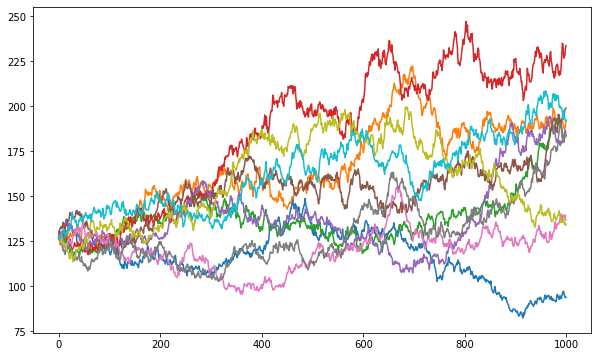

In [32]:
plt.figure(figsize=(10,6))
plt.plot(price_list);